In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataframe = pd.read_csv('ENFCeliacaSinDatosPerdidos.csv',sep=';')
clasificadores =['Si_tiene','No_tiene']

In [3]:
dataframe.head(10)

,AGE,GENDER,DIABETES,DIABETES_TYPE,DIARRHOEA,SHORT_STATURE,STICKY_STOOL,WEIGHT_LOSS,IGA,IGG,IGM,DISEASE_DIAGOSE
0,10,0,1,1,2,0,0,0,1.30,10.0,1.00,1
1,9,0,1,1,0,0,0,0,1.50,12.5,1.30,1
2,8,1,1,1,1,1,1,1,0.40,8.0,0.50,1
3,10,0,1,1,1,0,0,0,0.98,9.0,0.66,1
4,9,0,1,1,0,0,0,0,1.00,10.5,1.10,1
5,8,1,1,1,0,1,1,1,1.10,9.5,1.00,1
6,9,0,1,1,1,1,1,1,2.10,11.4,1.00,1
7,5,1,1,1,0,0,1,1,0.80,12.0,0.98,1
8,6,1,1,1,0,0,1,1,1.50,8.0,1.10,1
9,4,0,1,1,1,1,1,1,0.42,11.5,1.00,1


In [5]:
dataframe.describe()

,AGE,GENDER,DIABETES,DIABETES_TYPE,DIARRHOEA,SHORT_STATURE,STICKY_STOOL,WEIGHT_LOSS,IGA,IGG,IGM,DISEASE_DIAGOSE
count,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000
mean,12.768812,0.491387,0.829102,0.867180,0.971442,0.720762,0.825023,0.686310,1.427384,10.052901,1.236963,0.835449
std,7.434250,0.500039,0.376505,0.478131,0.819601,0.715868,0.380034,0.464097,1.110042,2.047683,0.447216,0.370859
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.340000,5.000000,0.500000,0.000000
25%,8.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,8.700000,0.980000,1.000000
50%,10.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.100000,10.000000,1.100000,1.000000
75%,15.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.800000,12.000000,1.500000,1.000000
max,35.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,9.000000,15.300000,2.700000,1.000000


In [9]:
dataframe.groupby('DISEASE_DIAGOSE').size()

DISEASE_DIAGOSE
0     363
1    1843
dtype: int64

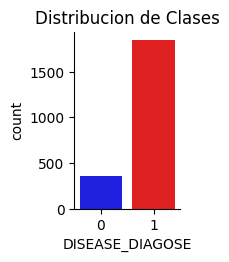

In [11]:
#MOSTRAR GRAFICO DE BARRAS
import seaborn as sb

#Aseguramos que los numeros son enteros
dataframe['DISEASE_DIAGOSE'] = dataframe['DISEASE_DIAGOSE'].astype(int)
sb.catplot(x='DISEASE_DIAGOSE', hue='DISEASE_DIAGOSE', data=dataframe, kind="count", height = 2.5, aspect=0.8, palette={0:"blue", 1:"red"}, legend = False)
plt.title("Distribucion de Clases")
plt.show()

In [13]:
# separamos el dataframe en x y
y = dataframe['DISEASE_DIAGOSE']
x = dataframe.drop('DISEASE_DIAGOSE', axis = 1)

              precision    recall  f1-score   support

    Si_tiene       0.96      0.80      0.87       103
    No_tiene       0.96      0.99      0.98       559

    accuracy                           0.96       662
   macro avg       0.96      0.90      0.93       662
weighted avg       0.96      0.96      0.96       662



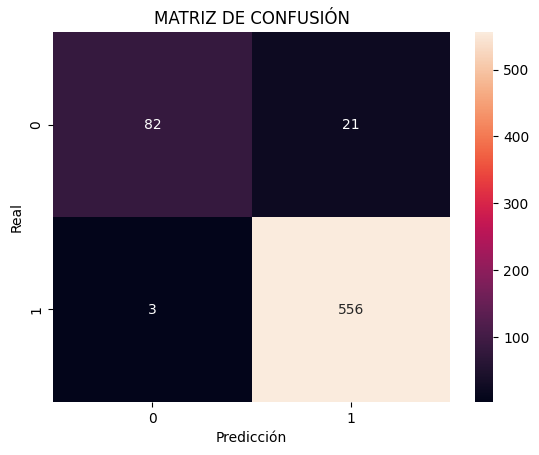

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=30)

from sklearn.neighbors import KNeighborsClassifier
knn_mm = KNeighborsClassifier(n_neighbors=5)

#Entrenar el algoritmo
knn_mm.fit(x_train,y_train)

predicciones = knn_mm.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,predicciones).ravel()

sns.heatmap(confusion_matrix(y_test,predicciones), annot = True, fmt = "d")
plt.title('MATRIZ DE CONFUSIÓN')
plt.xlabel('Predicción')
plt.ylabel('Real')

print(classification_report(y_test,predicciones,target_names=clasificadores))

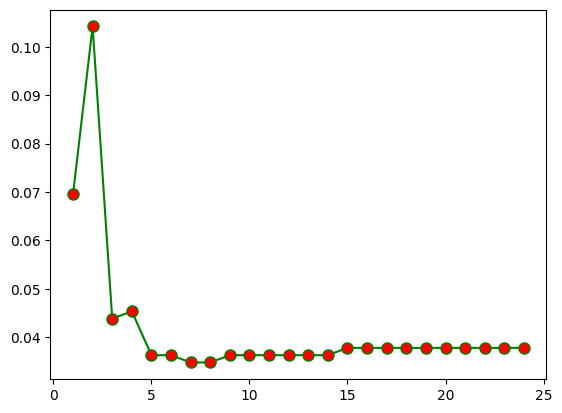

In [17]:
tasa_error = []
for i in range(1,25):
    knn_mm = KNeighborsClassifier(n_neighbors=i)
    knn_mm.fit(x_train,y_train)
    prediction_i = knn_mm.predict(x_test)
    tasa_error.append(np.mean(prediction_i != y_test))

valores = range(1,25)
plt.plot(valores, tasa_error, color="green", marker="o", markerfacecolor = "red", markersize = "8")

              precision    recall  f1-score   support

    Si_tiene       0.96      0.80      0.87       103
    No_tiene       0.96      0.99      0.98       559

    accuracy                           0.96       662
   macro avg       0.96      0.90      0.93       662
weighted avg       0.96      0.96      0.96       662



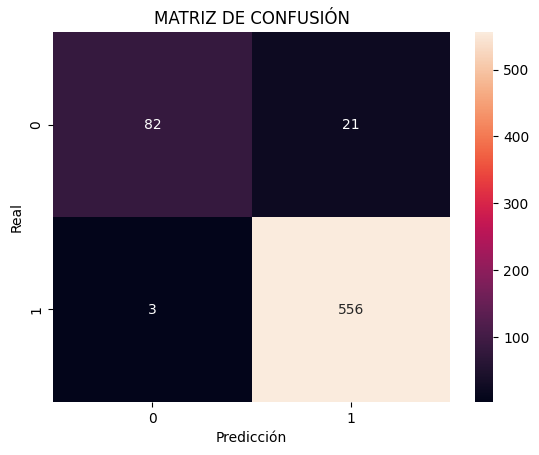

In [19]:
knn_mm = KNeighborsClassifier(n_neighbors=5)

#Entrenar el algoritmo
knn_mm.fit(x_train,y_train)

predicciones = knn_mm.predict(x_test)

sns.heatmap(confusion_matrix(y_test,predicciones), annot = True, fmt = "d")
plt.title('MATRIZ DE CONFUSIÓN')
plt.xlabel('Predicción')
plt.ylabel('Real')

print(classification_report(y_test,predicciones,target_names=clasificadores))

In [21]:
#A probar 
print(knn_mm.predict([[9,0,1,1,0,0,0,0,1.50,12.5,1.30]]))
print(knn_mm.predict_proba([[9,0,1,1,0,0,0,0,1.50,12.5,1.30]]))

[1]
[[0. 1.]]


C:\Users\CESAR\capgit\FormularioCancerDeMama\TP3-2025-1\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\CESAR\capgit\FormularioCancerDeMama\TP3-2025-1\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [23]:
#corregimos advertencia
print(knn_mm.predict(pd.DataFrame([[9,0,1,1,0,0,0,0,1.50,12.5,1.30]], columns=x.columns)))
print(knn_mm.predict_proba(pd.DataFrame([[9,0,1,1,0,0,0,0,1.50,12.5,1.30]],columns=x.columns)))

[1]
[[0. 1.]]
